# Entrenar una ia para calcular celsius --> Fahrenheit. Red simple

In [13]:
'''
numpy se utiliza para trabajar fácilmente con arreglos numéricos.
'''
import tensorflow as tf
import numpy as np

In [ ]:
'''
Declaramos dos np.arrays: Uno con las entradas de los valores celsius
y otro con los valores de salida tras la transformación. Estos son los
Arrays que la IA utilizará para aprender
'''
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
''' 
DISEÑO DEL MODELO DE RED NEURONAL:
Para ello se urilizará el Framework KERAS (Ya viene integrado en tensorflow)
KERAS permite la creación de redes neuronales de manera simple.

En este caso, el modelo solo tendrá dos capas; capa de ENTRADA y capa de SALIDA.
Con Keras podemos definir las dos capas por separado, o definir solo la de salida 
(indicando el número de neuronas que tiene) dando por hecho que hay una capa de entrada 
(también indicando el núemro de neuronas que tiene) <--(vamos a usar esta opción)

Definimos la capa como tipo DENSA. Esto sirve para indicar que todas las neuronas de la
capa de salida, están conectadas con todas las neuronas de la capa de salida. En nuestro ejemplo
solo tenemos una neurona en cada capa, por tanto solo habrá una unión. Existen capas NO DENSAS donde
no se cumple lo anterior.

En la variable modelo, establecemos el modelo de la IA, que en este caso se
escoge como secuencial (para redes neuronales simples, en caso de otros modelos de redes
como los que usaremos para diferenciar imágenes usaremos otro) y le asignamos las capas.
'''
capa = tf.keras.layers.Dense(units =1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
''' 
COMPILAR EL MODELO --> Para que pueda ser entrenado
Tenemos que decirle como queremos que procese los cálculos para optimizar el aprendizaje.
indicamos dos propiedades; el optimizador y la función de pérdida.
-Optimizador: Utilizamos uno llamado Adam. Es un algoritmo que le permite a la red
ajustar los pesos y sesgos para que aprenda de forma eficiente y no desaprenda.
El valor que le indicamos es la tasa de aprendizaje, ese numero le dice a la red cuanto ajustar los pesos
y sesgos. Si es pequeño ajustará muy poco y tardará mucho en aprender. Si es muy grande se pàsará
del númeroesperado y no podrá realizar cambios finos más precisos. Debemos escoger bien este número.
Función de pérdida: Para la función de pérdida usaremos un algoritmo llamado error cuadrático medio.
Considera que una pequeña cantidad de errores GRANDES es PEOR que muchos errores pequeños.

'''
modelo.compile(
   optimizer = tf.keras.optimizers.Adam(0.1),
   loss='mean_squared_error'
)   

In [ ]:
''' 
Comenzamos el entrenamiento con el método fit()
Para ello le metemos los valores de entrada, los de salida y le indicamos cuantas veces queremos
que realice el entrenamiento. Lo de verbose = false es para que no imprima muchos datos
que no nos sirven
'''
print("Comenzando el entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose= False)
print("¡Modelo entrenado!")

Comenzando el entrenamiento...
¡Modelo entrenado!


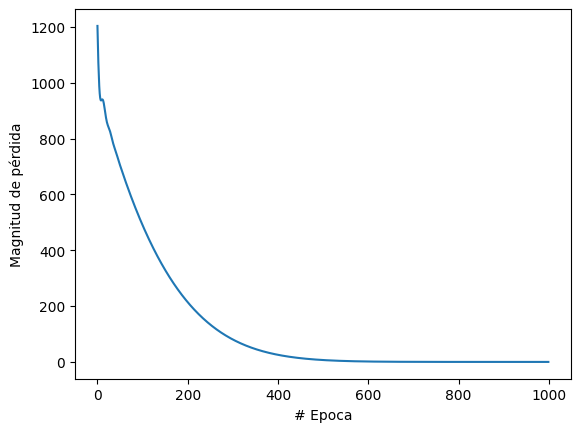

In [ ]:
''' 
Ahora imprimimos el resultado de la función de pérdida. Este resultado indica 
que tan mal están los resultados de la red en cada vuelta que dió en el entrenamiento.
Usamos matploid para mostrar gráficos.
Vemos que en este caso, alrededor de la vuelta 500 ya no aprendió mas.
'''
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [19]:
print("Hagamos una predicción!")
entrada = np.array([100.0], dtype=float)
resultado = modelo.predict(entrada)
print("El resultado es "+str(resultado)+" fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
El resultado es [[211.74405]] fahrenheit!


In [ ]:
''' 
Esta línea no es necesaria y solo aporta información relevante en redes simples como
esta. En redes más complejas es dificil interpretar estos resultados.
Lo que vamos a ver son los valores que finalmente se asignó al peso de la conexión
entre las dos únicas neuronas de la red y el sesgo asignado a la neurona de salida.
peso: 1.7981337
sesgo: 31.930674
En este caso, al ser una función lineal, es posible resolver este problema con una red simple.
Sin embargo, una operación más compleja requiere de una red mas sofisticada.
'''
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7981337]], dtype=float32), array([31.930674], dtype=float32)]
